In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

##### ================== Functions ==================

In [11]:
def add_categorical(df, features):
    """
    Adds columns to the sent dataframe based on the df_fix (preprocessed) dataframe
    """
    for F in features:
        df[F] = df_fix[F]

In [117]:
def bar_plot(df, feature):
    
    #Grouping to show relevant proportions
    dfo = df\
            .groupby(by=['merged_labels'] + [feature])\
            .size()\
            .to_frame()\
            .reset_index()\
            .rename(columns={0:'Prop'})

    dfo['Prop'] = np.round( ( dfo['Prop'] * 100) / len(df_clust) , 2)
    
    #Creating plot
    sns.catplot(x="merged_labels", 
                y="Prop", 
                hue = feature, 
                kind="bar", 
                palette ='jet_r',
                data=dfo)#, aspect=25/11)
    
    plt.ylabel('Proportion')
    plt.xlabel('Clusters')
    plt.title(feature)
    

##### =============================================

## Importing Data:

Importing the original dataset:

In [3]:
df_fix = pd.read_csv('pre_processed_data.csv')

Importing the labeled data to describe each cluster:

In [68]:
df_clust = pd.read_csv('Final_Clustering_Solution.csv')

# Dropping the unwanted columns

df_clust.drop(columns=['kmeans_SE', 'kmeans_donation'], inplace = True)

After doing some analysis on the PVA metadata we selected some categorical features to illustrate the behaviour of the clusters:

In [83]:
categorical_features = ['WEALTH1','NUMCHLD','MAJOR', 'INCOME', 'GENDER', 'DOMAIN']

##### Using the function defined to add the categorical features on the dataframe.

In [84]:
add_categorical(df_clust, categorical_features)

Manually encoding some DOMAIN:

In [85]:
#Manually encoding DOMAIN

df_clust['Urbanicity level']=0
df_clust['Socio-Economic']=0

for i in range(len(df_clust)):
    df_clust['Urbanicity level'][i] = df_clust['DOMAIN'][i][0]
    df_clust['Socio-Economic'][i] = df_clust['DOMAIN'][i][1]
    
    if df_clust['Socio-Economic'][i]==4:
        df_clust['Socio-Economic'][i]=3
        
df_clust.drop(columns='DOMAIN', inplace=True)

<ipython-input-85-d12dbd29783a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['Urbanicity level'][i] = df_clust['DOMAIN'][i][0]
C:\Users\maike\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-85-d12dbd29783a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['Socio-Economic'][i] = df_clust['DOMAIN'][i][1]


#### Analyzing our clusters:

Let's use the function created above to analize our clusters in terms of the categorical features:

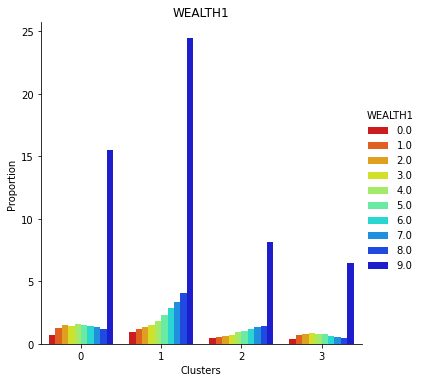

In [141]:
bar_plot(df_clust, categorical_features[0])

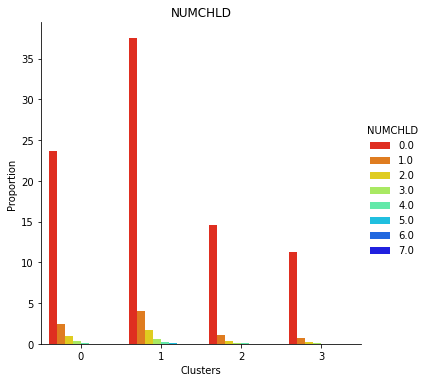

In [91]:
bar_plot(df_clust, categorical_features[1])

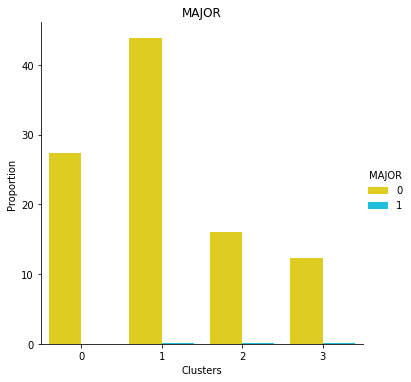

In [92]:
bar_plot(df_clust, categorical_features[2])

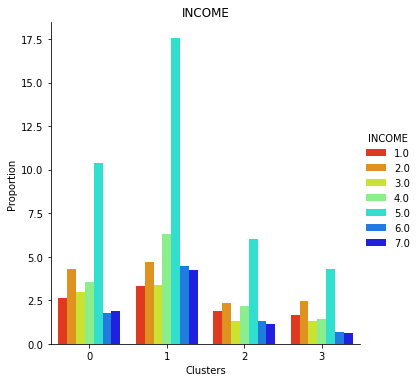

In [93]:
bar_plot(df_clust, categorical_features[3])

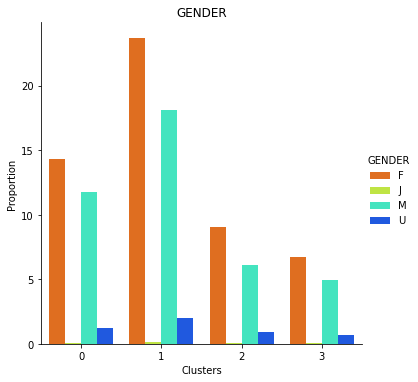

In [94]:
bar_plot(df_clust, categorical_features[4])

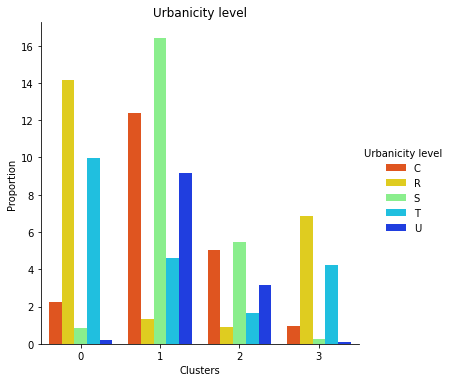

In [96]:
bar_plot(df_clust, 'Urbanicity level')

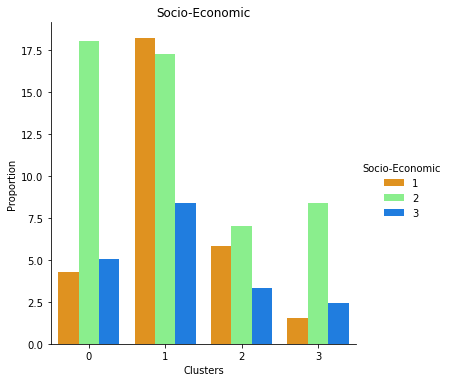

In [97]:
bar_plot(df_clust, 'Socio-Economic')

For state:

In [99]:
add_categorical(df_clust, ['STATE'])

<Figure size 1080x576 with 0 Axes>

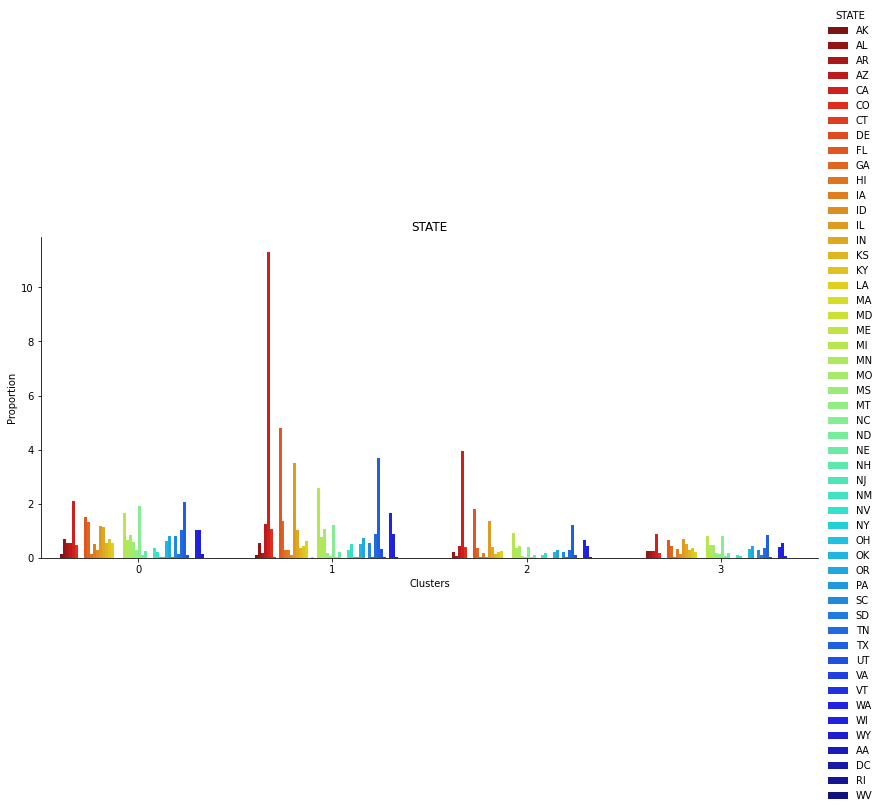

In [111]:
bar_plot(df_clust, 'STATE')

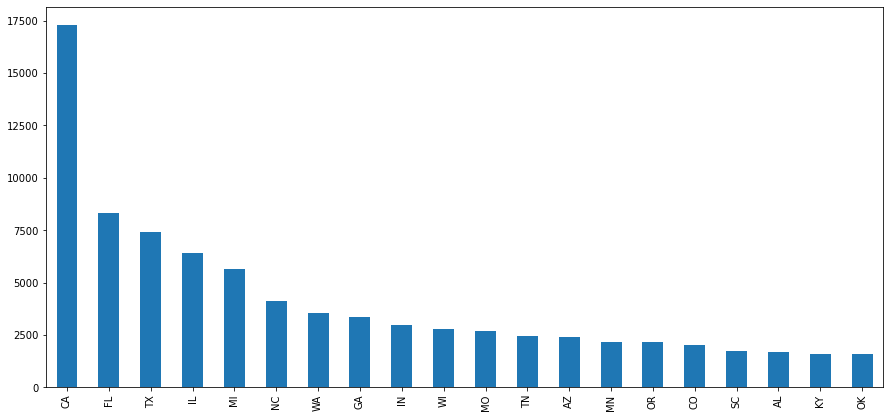

In [138]:
fig = df_clust.STATE.value_counts().head(20).plot.bar(figsize = (15,7)).get_figure()
fig.savefig("State_top20.png")

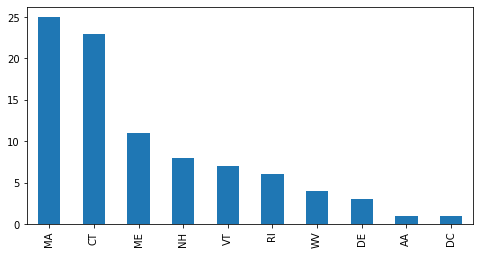

In [140]:
fig = df_clust.STATE.value_counts().tail(10).plot.bar(figsize = (8,4)).get_figure()
fig.savefig("State_bottom20.png")